In [21]:
from pyprojroot import here
import json
import os
data_dir = here("data/papers/Li-Mn-O")

files = os.listdir(data_dir)
files = [f for f in files if f.endswith('_synthesis_and_challenges.json')]

print("Files:", files)
#
challenge_texts = []
solution_texts = []
materials_names = []
stages = []
challenge_stage = 'application'

# Loop through each file and extract the relevant information
for file in files:
    input_file = os.path.join(data_dir, file)

    with open(input_file, "r", encoding="utf-8") as f:
        synthesis_data = json.load(f)

    challenges_info = synthesis_data.get("challenges_info", [])

    # Prepare challenge and solution texts
    for c in challenges_info:
        if c.get("stage") == challenge_stage:
            challenge_texts.append(c.get("challenge", {}).get("description", "") + " "  + c.get("challenge", {}).get("impact", ""))
            solution_texts.append(c.get("solution", {}).get("description", "") + " " + c.get("solution", {}).get("methodology", ""))
            materials_names.append(c.get("material", ""))
            stages.append(c.get("stage", ""))
    

print("Num. of materials:", len(materials_names), "Materials:", materials_names)
print("Num. of stages:", len(stages), "Stages:", stages)
print("Num. of challenges:", len(challenge_texts), "Challenges:", challenge_texts)
print("Num. of solutions:", len(solution_texts), "Solutions:", solution_texts)

Files: ['Zeitschrift anorg allge chemie - September 1975 - Hoppe - Zur Kenntnis der Oxomanganate III     ber LiMnO2 und  ‐NaMnO2  1_synthesis_and_challenges.json', 'pang-et-al-2017-effects-of-fluorine-and-chromium-doping-on-the-performance-of-lithium-rich-li1-xmo2-(m-ni-mn-co)_synthesis_and_challenges.json', '1-s2.0-S0167273806002165-main_synthesis_and_challenges.json', '1-s2.0-S0167273899002350-main_synthesis_and_challenges.json', 'liu-et-al-2019-unified-view-of-the-local-cation-ordered-state-in-inverse-spinel-oxides_synthesis_and_challenges.json', '1-s2.0-002245969580034M-main_synthesis_and_challenges.json', 'c5ce02358k_synthesis_and_challenges.json', '1-s2.0-S0097848500000607-main_synthesis_and_challenges.json', '1-s2.0-S0022459697973667-main_synthesis_and_challenges.json', '1-s2.0-S0167273809003646-main_synthesis_and_challenges.json', '1-s2.0-S0925838805003890-main_synthesis_and_challenges.json', 'akimoto-et-al-2000-single-crystal-x-ray-diffraction-study-of-the-spinel-type-limn2o4_

# Categorize challenges using Azure Openai API

In [22]:
# Load environment variables from .env file
import dotenv
dotenv.load_dotenv()

# Set Azure OpenAI credentials
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_EMBEDDING_DEPLOYMENT_NAME = os.getenv("AZURE_EMBEDDING_DEPLOYMENT_NAME") # Deployment name
AZURE_EMBEDDING_MODEL_NAME = os.getenv("AZURE_EMBEDDING_MODEL_NAME")  # Model name
AZURE_EMBEDDING_MODEL_VERSION = os.getenv("AZURE_EMBEDDING_MODEL_VERSION")  # Model version
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")
AZURE_MODEL_DEPLOYMENT_NAME = os.getenv("AZURE_MODEL_DEPLOYMENT_NAME")  # Deployment name

In [23]:
import sys
from pathlib import Path
from pyprojroot import here

# Get the root directory of the project
root_dir = here()
print("Root directory:", root_dir)

# Add the parent directory (project root) to the Python path so 'prompts' can be imported
sys.path.append(str(root_dir))
print("Python path:", sys.path)

# Import the prompts
from prompts.challenge_categorization import (CHALLENGE_COMBINED_PROMPT, CHALLENGE_CATEGORY_IDENTIFICATION_PROMPT,
                                        CHALLENGE_CATEGORIZATION_PROMPT, CHALLENGE_COMBINED_PROMPT_WITH_IDS,
                                        CHALLENGE_COMBINED_PROMPT_WITH_IDS_COT)
print(CHALLENGE_COMBINED_PROMPT)



Root directory: /Users/arashkhajeh/GitHub/LLM-for-Materials
Python path: ['/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python312.zip', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/lib-dynload', '', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages', '/Users/arashkhajeh/GitHub/MMMM/src', '/Users/arashkhajeh/GitHub/LLM-for-Materials', '/Users/arashkhajeh/GitHub/LLM-for-Materials', '/Users/arashkhajeh/GitHub/LLM-for-Materials', '/Users/arashkhajeh/GitHub/LLM-for-Materials']

    A list of challenges related to {challenge_stage} of materials has been provided. Your task is to carefully read the following list of challenges and categorize them into different categories.
    At the same time, try to minimize overlapping between the categories by adding new categories if necessary.
    The categories should be based on the content of the challenges and should not be too broad or too specific.
    

In [24]:
from src.categorization import (evaluate_and_save_categorized_items,
                                group_and_categorize_challenges,
                                identify_challenge_categories,
                                categorize_challenges,
                                group_and_categorize_solutions,
                                identify_solution_categories,
                                categorize_solutions)


In [25]:
help(categorize_solutions)

Help on function categorize_solutions in module src.categorization:

categorize_solutions(solution_texts: list, challenge_stage: str = 'synthesis', prompt: str = '\n    You are a materials synthesis expert tasked with categorizing solutions occuring during {challenge_stage} of materials. A list of solutions related to {challenge_stage} of materials has been provided. Your task is to carefully read the following list of solutions and assign each solution to the most relevant category.\n    A list of solutions and a list of solution categories have been provided, and your task is to assign each solution to the most relevant category.\n\n    The solutions are as follows:\n    {solution_texts}\n\n    The categories are as follows:\n    {solution_categories}\n\n    IMPORTANT:\n    - Each solution must appear in the output exactly once, under a single category.\n    - Return ONLY the output as a JSON object in the following format:\n    - If a solution cannot be categorized, assign it to the

In [8]:

# Categorize the challenges
categorized_challenges = group_and_categorize_challenges(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                               prompt = CHALLENGE_COMBINED_PROMPT,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Capacity Fading and Cycle Stability': ['Severe capacity fade during cycling. Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.', 'Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. Limits the long-term usability of the material in practical battery applications.', "Capacity fading during cycling occurs in the higher charge voltage range (x < 0.45). This problem limits the material's long-term performance and reliability as a cathode in lithium-ion batteries.", 'Poor cyclability of the charge-discharge process in the 4-V region. Limits commercial applications of LiMn2O4 as a cathode material for rechargeable lithium batteries.', 'Capacity decline observed during cycling, particularly when cycling over both voltage plateaus. Capacity fade reduces the practical utility of the material as a rechargeable battery cathode.', 'Capacity fade due to particle cracking and pulverizat

In [9]:

output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_challenges_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=challenge_texts, categorized_items=categorized_challenges, output_file_path=output_file_path)


Num. of missing items: 0
Missing items: []
Duplicates: {}


# Categorization in two steps

In [11]:

# Identify the categories of challenges
challenge_categories = identify_challenge_categories(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                               prompt = CHALLENGE_CATEGORY_IDENTIFICATION_PROMPT,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", challenge_categories)
print("Num. of categories:", len(challenge_categories["Categories"]))

Categories: {'Categories': ['Capacity fading and cycle stability issues in lithium-ion batteries', 'Voltage decay and energy density reduction in battery materials', 'Phase transitions and structural instability affecting material performance', 'Jahn-Teller distortion-induced degradation in battery materials', 'Thermal instability and decomposition in high-temperature applications', 'Electrochemical inactivity and poor conductivity in cathode materials', 'Magnetic property degradation due to compositional or structural changes', 'Mechanical instability and particle cracking during cycling', 'Stoichiometry deviations and their impact on material properties', 'High-temperature effects on material stability and performance', 'Defects and their influence on lithium-ion transport and capacity', 'Surface area and catalytic activity limitations in materials', 'Irreversible capacity loss during initial cycling', 'Oxygen release and cation redistribution during synthesis or cycling', 'Sensitivi

In [12]:
# Categorize the challenges based on the identified categories
list_of_challenge_categories = challenge_categories.get("Categories", [])
categorized_challenges = categorize_challenges(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                               challenge_categories=list_of_challenge_categories,
                                                prompt = CHALLENGE_CATEGORIZATION_PROMPT,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Capacity fading and cycle stability issues in lithium-ion batteries': ['Severe capacity fade during cycling. Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.', 'Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. Limits the long-term usability of the material in practical battery applications.', "Capacity fading during cycling occurs in the higher charge voltage range (x < 0.45). This problem limits the material's long-term performance and reliability as a cathode in lithium-ion batteries.", 'Poor cyclability of the charge-discharge process in the 4-V region. Limits commercial applications of LiMn2O4 as a cathode material for rechargeable lithium batteries.', 'Capacity decline observed during cycling, particularly when cycling over both voltage plateaus. Capacity fade reduces the practical utility of the material as a rechargeable battery cathode.', 'Capacity fade due to 

In [13]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_challenges_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=challenge_texts, categorized_items=categorized_challenges, output_file_path=output_file_path)




Num. of missing items: 1
Missing items: ['Fast capacity fading during charge/discharge cycling at relatively high temperatures (e.g., 55°C). This problem significantly reduces the cycle stability and overall performance of the material as a cathode in lithium-ion batteries.']
Duplicates: {}
Not saving categorized items due to missing or duplicated IDs.


In [14]:
print("name of the categories:", list(categorized_challenges.keys()))
s = 0
for k, v in categorized_challenges.items():
    s += len(v)
print("Num. of challenges in the categories:", s)

name of the categories: ['Capacity fading and cycle stability issues in lithium-ion batteries', 'Voltage decay and energy density reduction in battery materials', 'Phase transitions and structural instability affecting material performance', 'Jahn-Teller distortion-induced degradation in battery materials', 'Thermal instability and decomposition in high-temperature applications', 'Electrochemical inactivity and poor conductivity in cathode materials', 'Magnetic property degradation due to compositional or structural changes', 'Mechanical instability and particle cracking during cycling', 'Stoichiometry deviations and their impact on material properties', 'High-temperature effects on material stability and performance', 'Defects and their influence on lithium-ion transport and capacity', 'Surface area and catalytic activity limitations in materials', 'Irreversible capacity loss during initial cycling', 'Oxygen release and cation redistribution during synthesis or cycling', 'Sensitivity 

# Categorizing using category and item IDs

In [26]:
challenge_texts_with_ids = [f"[{i+1}] {text}" for i, text in enumerate(challenge_texts)]
challenge_texts_with_ids

['[1] Severe capacity fade during cycling. Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.',
 '[2] Voltage decay during cycling, thought to originate from a transformation to a spinel-like phase at 3V. Voltage decay reduces the energy density and efficiency of the battery over time.',
 '[3] Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. Limits the long-term usability of the material in practical battery applications.',
 "[4] Substitution by non-magnetic d0 Ti4+ ions weakens the magnetic interactions between manganese ions. Weakening of magnetic interactions reduces the material's magnetic moment and affects its performance in applications requiring strong magnetic properties.",
 "[5] Phase transition observed around 280–290 K with hysteresis, leading to a dramatic drop in conductivity. Limits the material's performance as a cathode in rechargeable Li-ion batteries, particularly a

In [7]:

# Categorize the challenges
categorized_challenges = group_and_categorize_challenges(challenge_texts=challenge_texts_with_ids,
                                               challenge_stage=challenge_stage,
                                               prompt = CHALLENGE_COMBINED_PROMPT_WITH_IDS,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Capacity Fading and Cycle Stability Issues': [1, 3, 6, 7, 15, 18, 20, 24, 29, 30, 35], 'Voltage Decay and Energy Density Reduction': [2], 'Phase Transitions and Structural Instability': [5, 8, 9, 11, 19, 21, 26, 27, 31], 'Jahn-Teller Distortion Effects': [9, 11, 25, 26, 30], 'Thermal Stability and High-Temperature Effects': [22, 25, 28, 31, 32, 33, 41], 'Magnetic Property Challenges': [4, 13], 'Transport and Conductivity Limitations': [14, 16, 40], 'Synthesis and Material Preparation Issues': [23, 37, 38], 'Structural Defects and Lithium Accessibility': [36, 34], 'Electrochemical Inactivity and Redox Limitations': [44], 'Surface Area and Catalytic Activity': [42], 'Other': [10, 17, 39, 43, 45]}
Num. of categories: 12


In [8]:
# count the number of challenges in all categories and check for duplicates and missing challenges
s = 0
for k, v in categorized_challenges.items():
    s += len(v)
print("Num. of challenges in the categories:", s)
# check for duplicates
seen = []
duplicates = []
for k, v in categorized_challenges.items():
    for item in v:
        if item in seen:
            duplicates.append(item)
        seen.append(item)
print("Duplicates:", duplicates)


Num. of challenges in the categories: 50
Duplicates: [9, 11, 26, 30, 25, 31]


Why This Still Happens (Even with a Good Prompt)
Even with a clear prompt and structured ID-based formatting, LLMs can still violate constraints due to their inherent limitations:

✅ Your Prompt is Good, but…
GPT models:

Don’t "count" very reliably unless specifically forced to (e.g., via chain-of-thought logic),

Can repeat items if they feel contextually "relevant" to more than one category,

Might treat IDs like labels rather than strict tokens to track,

Are still more likely to hallucinate structure when the list is long (>30–40 items),

Might repeat the same ID in multiple places due to pattern imitation (especially with numbered lists).

Why Use Chain-of-Thought or ReAct Here?
GPT models are more accurate when they “think out loud.” CoT/ReAct structures:

Reduce hallucinations,

Help the model track constraints like "each ID only once",

Allow better auditing of how items were categorized.

🟡 Tradeoffs
Method	Pros	Cons
Standard (current)	Fast and compact	Prone to ID duplication/omission
Chain of Thought	Better constraint following, traceable steps	Slightly more verbose, may exceed token limits
ReAct Style	Per-ID clarity and clean action log	Slower, needs post-processing to extract final JSON

In [15]:
# Using Chain of Thought (CoT) for challenge categorization

# Categorize the challenges
categorized_challenges = group_and_categorize_challenges(challenge_texts=challenge_texts_with_ids,
                                               challenge_stage=challenge_stage,
                                               prompt = CHALLENGE_COMBINED_PROMPT_WITH_IDS_COT,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Cycle life and stability issues': [1, 3, 6, 7, 15, 18, 24, 29, 35], 'Phase stability and transformation issues': [2, 5, 8, 17, 19, 43], 'Magnetic property degradation': [4, 13], 'Structural instability and Jahn-Teller effects': [9, 11, 12, 21, 25, 26, 27, 30, 36, 37], 'Mechanical instability and surface degradation': [10, 20], 'Electronic and ionic conductivity issues': [14, 16, 34, 40], 'Electrochemical performance limitations': [22, 44, 45], 'Synthesis-related issues': [23], 'Oxygen loss and thermal effects': [28, 31, 32, 33, 38, 39, 41], 'Surface area and catalytic activity issues': [42]}
Num. of categories: 10


In [20]:
# count the number of challenges in all categories and check for duplicates and missing challenges
s = 0
for k, v in categorized_challenges.items():
    s += len(v)
print("Num. of challenges in the categories:", s)
# check for duplicates
seen = []
duplicates = []
for k, v in categorized_challenges.items():
    for item in v:
        if item in seen:
            duplicates.append(item)
        seen.append(item)
print("Duplicates:", duplicates)
# check for missing challenges
missing_challenges = []
for i in range(1, len(challenge_texts_with_ids) + 1):
    if i not in seen:
        missing_challenges.append(i)
print("Missing challenges:", missing_challenges)


Num. of challenges in the categories: 45
Duplicates: []
Missing challenges: []


# Adding category label to each challenge to improve visualization

In [16]:
# Load the categorized challenges from the JSON file
output_file = os.path.join(data_dir, "clustering-results",f"categorized_challenges_{challenge_stage}.json")
with open(output_file, "r", encoding="utf-8") as f:
    categorized_challenges = json.load(f)

In [17]:
challenge_texts_for_embedding = []

for challenge in challenge_texts:
    # find catergory for the challenge from list of categories
    for category, challenges in categorized_challenges.items():
        if challenge in challenges:
            
            # append the challenge text and category to the list
            category_challenge = f"{category}: {challenge}"
            challenge_texts_for_embedding.append(category_challenge)

print(challenge_texts_for_embedding)


['Capacity Fading and Cycle Stability: Severe capacity fade during cycling. Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.', 'Voltage Decay and Energy Density: Voltage decay during cycling, thought to originate from a transformation to a spinel-like phase at 3V. Voltage decay reduces the energy density and efficiency of the battery over time.', 'Capacity Fading and Cycle Stability: Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. Limits the long-term usability of the material in practical battery applications.', "Magnetic Properties and Interactions: Substitution by non-magnetic d0 Ti4+ ions weakens the magnetic interactions between manganese ions. Weakening of magnetic interactions reduces the material's magnetic moment and affects its performance in applications requiring strong magnetic properties.", "Phase Transitions and Structural Instability: Phase transition observed aroun

In [18]:
import openai
from openai import AzureOpenAI

# Setup Azure client (new SDK structure)
client = AzureOpenAI(
    api_key=AZURE_OPENAI_API_KEY,
    api_version=AZURE_OPENAI_API_VERSION,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
)

# Embedding function using the new SDK
def get_embeddings(texts, deployment_name):
    embeddings = []
    for text in texts:
        response = client.embeddings.create(
            input=text,
            model=deployment_name,  # Must match your Azure deployment name
        )
        embeddings.append(response.data[0].embedding)
    return embeddings

In [19]:
challenge_texts_for_embedding, len(challenge_texts_for_embedding)

(['Capacity Fading and Cycle Stability: Severe capacity fade during cycling. Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.',
  'Voltage Decay and Energy Density: Voltage decay during cycling, thought to originate from a transformation to a spinel-like phase at 3V. Voltage decay reduces the energy density and efficiency of the battery over time.',
  'Capacity Fading and Cycle Stability: Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. Limits the long-term usability of the material in practical battery applications.',
  "Magnetic Properties and Interactions: Substitution by non-magnetic d0 Ti4+ ions weakens the magnetic interactions between manganese ions. Weakening of magnetic interactions reduces the material's magnetic moment and affects its performance in applications requiring strong magnetic properties.",
  "Phase Transitions and Structural Instability: Phase transition obser

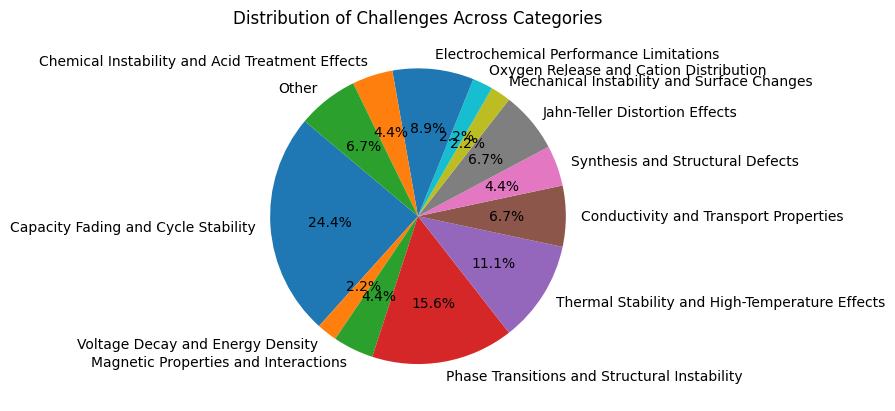

In [20]:
# Plot the pie chart
# Count the number of challenges in each category
category_counts = {category: len(challenges) for category, challenges in categorized_challenges.items()}
import matplotlib.pyplot as plt
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Challenges Across Categories")
plt.show()

In [21]:
len(challenge_texts), len(solution_texts), len(challenge_texts_for_embedding)

# get the embeddings for the challenges
challenges_embeddings = get_embeddings(challenge_texts_for_embedding, AZURE_EMBEDDING_DEPLOYMENT_NAME)

In [22]:
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
import random


# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap_challenges = reducer.fit_transform(challenges_embeddings)

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [23]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS, Legend, LegendItem
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges
data = pd.DataFrame({
    "x": reduced_vectors_umap_challenges[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap_challenges[:, 1],  # Second dimension of reduced vectors
    "text": challenge_texts_for_embedding,  # Combined text of challenges
    "category": [c.split(":")[0] for c in challenge_texts_for_embedding],  # Extract category from text
    "type": ["Challenge"] * len(challenge_texts_for_embedding),  # Type label
    "alpha": [0.8] * len(challenge_texts_for_embedding)  # Initialize alpha for dynamic visibility
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)
unique_categories = data["category"].unique().tolist()
palette = Category20[len(unique_categories)]
color_map = factor_cmap("category", palette=palette, factors=unique_categories)

# Create a square Bokeh figure
p = figure(title="2D Visualization of Challenges",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=1100, height=500)  # Keep plot square

# Scatter plot with color mapping
scatter = p.scatter("x", "y", source=source, size=10, color=color_map, fill_alpha="alpha", line_alpha="alpha")

# Create custom legend items by rendering each category separately
legend_items = []
for i, category in enumerate(unique_categories):
    color = palette[i]
    category_df = data[data["category"] == category]
    category_source = ColumnDataSource(category_df)
    renderer = p.scatter("x", "y", source=category_source, size=10, color=color, alpha=0.8)
    legend_items.append(LegendItem(label=category, renderers=[renderer]))

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Category:</b> @category<br>
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points dynamically
callback = CustomJS(args=dict(source=source), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedCategory = data['category'][selectedIndex];

        // Filter points to show only the selected category
        for (let i = 0; i < data['x'].length; i++) {
            if (data['category'][i] === selectedCategory) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")
p.add_tools(TapTool(callback=callback))

# Add the legend outside the plot
legend = Legend(items=legend_items, title="Categories", click_policy="hide")
p.add_layout(legend, 'right')  # Place legend outside but still part of plot layout

# Show plot
output_notebook()
show(p)

Loading BokehJS ...

In [24]:
len(challenge_texts_for_embedding)

45

# Catergorizing the solutions

In [25]:
import sys
from pathlib import Path
from pyprojroot import here

# Get the root directory of the project
root_dir = here()
print("Root directory:", root_dir)

# Add the parent directory (project root) to the Python path so 'prompts' can be imported
sys.path.append(str(root_dir))
print("Python path:", sys.path)

# Import the prompts
from prompts.solution_categorization import SOLUTION_COMBINED_PROMPT
from prompts.solution_categorization import SOLUTION_CATEGORY_IDENTIFICATION_PROMPT
from prompts.solution_categorization import SOLUTION_CATEGORIZATION_PROMPT



Root directory: /Users/arashkhajeh/GitHub/LLM-for-Materials
Python path: ['/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python312.zip', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/lib-dynload', '', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages', '/Users/arashkhajeh/GitHub/MMMM/src', '/Users/arashkhajeh/GitHub/LLM-for-Materials', '/Users/arashkhajeh/GitHub/LLM-for-Materials']


In [27]:
categorized_solutions = group_and_categorize_solutions(solution_texts=solution_texts,
                                                    challenge_stage=challenge_stage,
                                                    prompt = SOLUTION_COMBINED_PROMPT,
                                                    api_key=AZURE_OPENAI_API_KEY,
                                                    azure=True,
                                                    model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                    temp=0.0,
                                                    azure_api_version=AZURE_OPENAI_API_VERSION,
                                                    azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_solutions)
print("Num. of categories:", len(categorized_solutions))

Categories: {'Doping and Substitution': ['Doping with 2% Cr improved cycle performance by ∼13%. Cationic substitution at the R3̅m metal (3a) site.', 'Cr doping suppressed voltage decay. Cationic substitution at the R3̅m metal (3a) site.', 'F doping enhanced capacity and rate performance but worsened cycle stability. Anionic substitution at the R3̅m oxygen (6c) site.', 'Doping Ru+4 at Mn+4 sites to reduce impedance and increase capacitance. Substitution of Ru+4 ions and measurement of frequency-dependent impedance and capacitance.', 'Substitution of Cr for Mn in the material stabilizes the structure and improves cycle performance by reducing capacity fading. Selective doping of Cr into the 16d octahedral positions to stabilize the Mn-Cr-O network.', 'Partial substitution of Mn in LiMn2O4 with other cations (e.g., Fe, Al, Ni, Cr, Zn, Mg) to reduce Mn3+ content and stabilize the cubic structure. Doping with trivalent and divalent cations to enhance structural stability.', 'Replacement of 

In [28]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_solutions_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=solution_texts, categorized_items=categorized_solutions, output_file_path=output_file_path)


Num. of missing items: 1
Missing items: ['The authors attributed the behavior to the presence of stacking faults in LT-LiMnO2, which facilitate the direct structural conversion. Comparison of microstructural differences between LT-LiMnO2 and HT-LiMnO2 using in situ X-ray diffraction and structural analysis.']
Duplicates: {}
Not saving categorized items due to missing or duplicated IDs.


# Categorizing Solutions in Two Steps

In [29]:
print("Prompt:", SOLUTION_CATEGORY_IDENTIFICATION_PROMPT)

Prompt: 
    You are a materials synthesis expert tasked with identifying categories of solutions. A list of solutions related to {challenge_stage} of materials has been provided. Your task is to carefully read the following list of solutions and identify all categories of solutions.
    The categories should be based on the content of the solutions. Try to identify categories that encompass few solutions, but at the same time be specific enough to capture the essence of solutions in each category for materials scientists.
    Each category should be a string representing a range of solution items related to {challenge_stage} of materials.
    Categories should encompass all solutions in the list.
    The categories should be meaningful and relevant to the solutions provided.
    The solutions are as follows:
    {solution_texts}

    Return ONLY the output as a JSON object in the following format:

    {{
    "Categories": ["category 1", "category 2"],
    }}
    


In [30]:

# Identify the categories of solutions
solution_categories = identify_solution_categories(solution_texts=solution_texts,
                                               challenge_stage=challenge_stage,
                                               prompt = SOLUTION_CATEGORY_IDENTIFICATION_PROMPT,
                                            api_key=AZURE_OPENAI_API_KEY,
                                            azure=True,
                                            model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                            temp=0.0,
                                            azure_api_version=AZURE_OPENAI_API_VERSION,
                                            azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", solution_categories)
print("Num. of categories:", len(solution_categories["Categories"]))

Categories: {'Categories': ['Cationic and anionic substitution for performance enhancement', 'Magnetic and thermal behavior studies using advanced characterization techniques', 'Stoichiometry modification and synthesis optimization', 'Jahn-Teller distortion suppression and structural stabilization', 'Electrochemical and chemical delithiation processes', 'Phase transition and structural evolution analysis', 'Doping with transition metals to improve stability and performance', 'Defect engineering and characterization', 'Thermal behavior and decomposition mechanism studies', 'Electronic structure and charge transfer analysis using DFT', 'Surface coating and protective layer formation', 'Gas evolution and dissolution behavior analysis', 'Lithium-ion ordering and percolation path optimization', 'High-temperature and low-temperature synthesis methods', 'Reversible cation distribution and interstitial site occupation', 'Catalytic performance enhancement through delithiation']}
Num. of categor

In [31]:
print("Promt:", SOLUTION_CATEGORIZATION_PROMPT)

Promt: 
    You are a materials synthesis expert tasked with categorizing solutions occuring during {challenge_stage} of materials. A list of solutions related to {challenge_stage} of materials has been provided. Your task is to carefully read the following list of solutions and assign each solution to the most relevant category.
    A list of solutions and a list of solution categories have been provided, and your task is to assign each solution to the most relevant category.

    The solutions are as follows:
    {solution_texts}

    The categories are as follows:
    {solution_categories}

    IMPORTANT:
    - Each solution must appear in the output exactly once, under a single category.
    - Return ONLY the output as a JSON object in the following format:
    - If a solution cannot be categorized, assign it to the "Other" category.

    {{
        "Category 1": ["solution 1", "solution 2"],
        "Category 2": ["solution 3", "solution 4"]
    }}
    


In [32]:
# Categorize the challenges based on the identified categories
list_of_solution_categories = solution_categories.get("Categories", [])
categorized_solutions = categorize_solutions(solution_texts=solution_texts,
                                               challenge_stage=challenge_stage,
                                               solution_categories=list_of_solution_categories,
                                               prompt = SOLUTION_CATEGORIZATION_PROMPT,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_solutions)
print("Num. of categories:", len(categorized_solutions))

Categories: {'Cationic and anionic substitution for performance enhancement': ['Doping with 2% Cr improved cycle performance by ∼13%. Cationic substitution at the R3̅m metal (3a) site.', 'Cr doping suppressed voltage decay. Cationic substitution at the R3̅m metal (3a) site.', 'F doping enhanced capacity and rate performance but worsened cycle stability. Anionic substitution at the R3̅m oxygen (6c) site.', 'Doping Ru+4 at Mn+4 sites to reduce impedance and increase capacitance. Substitution of Ru+4 ions and measurement of frequency-dependent impedance and capacitance.', 'Substitution of Cr for Mn in the material stabilizes the structure and improves cycle performance by reducing capacity fading. Selective doping of Cr into the 16d octahedral positions to stabilize the Mn-Cr-O network.', 'Partial substitution of Mn in LiMn2O4 with other cations (e.g., Fe, Al, Ni, Cr, Zn, Mg) to reduce Mn3+ content and stabilize the cubic structure. Doping with trivalent and divalent cations to enhance st

In [33]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_solutions_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=solution_texts, categorized_items=categorized_solutions, output_file_path=output_file_path)


Num. of missing items: 3
Missing items: ['Detailed investigation of lithium-deficient samples and planned neutron diffraction measurements. Characterization using advanced techniques like Rietveld refinement and neutron diffraction to understand phase behavior.', 'Investigated the bond-length fluctuation of the Mn4O4 heterocubane and its migration as a polaron in the high-temperature phase to understand its role in opening the bottleneck of the oxygen triangle. Analysis of bond-length fluctuation and its effect on oxygen ion positions forming the bottleneck.', 'The authors noted that the voltage range had not been optimized and suggested that confining cycling to one voltage plateau could mitigate capacity fade. Preliminary cycling data were collected to evaluate performance, and the authors proposed further optimization of the voltage range.']
Duplicates: {}
Not saving categorized items due to missing or duplicated IDs.


# Visualizing solutions

In [34]:
# Load the categorized solutions from the JSON file
output_file = os.path.join(data_dir, "clustering-results",f"categorized_solutions_{challenge_stage}.json")
with open(output_file, "r", encoding="utf-8") as f:
    categorized_solutions = json.load(f)

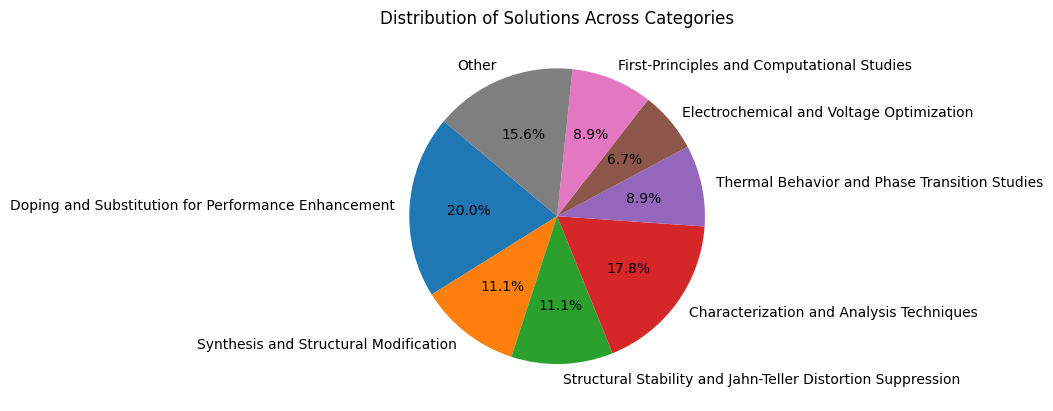

In [35]:
# Plot the pie chart
# Count the number of solutions in each category
category_counts = {category: len(solutions) for category, solutions in categorized_solutions.items()}
import matplotlib.pyplot as plt
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Solutions Across Categories")
plt.show()

In [36]:
solution_texts_for_embedding = []

for solution in solution_texts:
    # find catergory for the solution from list of categories
    for category, solutions in categorized_solutions.items():
        if solution in solutions:

            # append the solution text and category to the list
            category_solution = f"{category}: {solution}"
            solution_texts_for_embedding.append(category_solution)

print(solution_texts_for_embedding)

['Doping and Substitution for Performance Enhancement: Doping with 2% Cr improved cycle performance by ∼13%. Cationic substitution at the R3̅m metal (3a) site.', 'Doping and Substitution for Performance Enhancement: Cr doping suppressed voltage decay. Cationic substitution at the R3̅m metal (3a) site.', 'Doping and Substitution for Performance Enhancement: F doping enhanced capacity and rate performance but worsened cycle stability. Anionic substitution at the R3̅m oxygen (6c) site.', 'Characterization and Analysis Techniques: Studied the temperature and magnetic field dependencies of magnetization to understand the impact of Ti substitution. Measured Field Cooled (FC) and Zero Field Cooled (ZFC) magnetization curves and fitted data using Curie–Weiss law.', 'Characterization and Analysis Techniques: Investigated local and long-range cation arrangements above the phase transition temperature to understand the behavior. Neutron PDF data collection and refinement of charge-ordered phase s

In [37]:
solution_texts_for_embedding, len(solution_texts_for_embedding)

(['Doping and Substitution for Performance Enhancement: Doping with 2% Cr improved cycle performance by ∼13%. Cationic substitution at the R3̅m metal (3a) site.',
  'Doping and Substitution for Performance Enhancement: Cr doping suppressed voltage decay. Cationic substitution at the R3̅m metal (3a) site.',
  'Doping and Substitution for Performance Enhancement: F doping enhanced capacity and rate performance but worsened cycle stability. Anionic substitution at the R3̅m oxygen (6c) site.',
  'Characterization and Analysis Techniques: Studied the temperature and magnetic field dependencies of magnetization to understand the impact of Ti substitution. Measured Field Cooled (FC) and Zero Field Cooled (ZFC) magnetization curves and fitted data using Curie–Weiss law.',
  'Characterization and Analysis Techniques: Investigated local and long-range cation arrangements above the phase transition temperature to understand the behavior. Neutron PDF data collection and refinement of charge-ordere

In [38]:
# get the embeddings for the solutions
solutions_embeddings = get_embeddings(solution_texts_for_embedding, AZURE_EMBEDDING_DEPLOYMENT_NAME)


In [39]:
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap_solutions = reducer.fit_transform(solutions_embeddings)

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [40]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS, Legend, LegendItem
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges
data = pd.DataFrame({
    "x": reduced_vectors_umap_solutions[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap_solutions[:, 1],  # Second dimension of reduced vectors
    "text": solution_texts_for_embedding,  # Combined text of solutions
    "category": [c.split(":")[0] for c in solution_texts_for_embedding],  # Extract category from text
    "type": ["Solution"] * len(solution_texts_for_embedding),  # Type label
    "alpha": [0.8] * len(solution_texts_for_embedding)  # Initialize alpha for dynamic visibility
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)
unique_categories = data["category"].unique().tolist()
palette = Category20[len(unique_categories)]
color_map = factor_cmap("category", palette=palette, factors=unique_categories)

# Create a square Bokeh figure
p = figure(title="2D Visualization of Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=1100, height=500)  # Keep plot square

# Scatter plot with color mapping
scatter = p.scatter("x", "y", source=source, size=10, color=color_map, fill_alpha="alpha", line_alpha="alpha")

# Create custom legend items by rendering each category separately
legend_items = []
for i, category in enumerate(unique_categories):
    color = palette[i]
    category_df = data[data["category"] == category]
    category_source = ColumnDataSource(category_df)
    renderer = p.scatter("x", "y", source=category_source, size=10, color=color, alpha=0.8)
    legend_items.append(LegendItem(label=category, renderers=[renderer]))

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Category:</b> @category<br>
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points dynamically
callback = CustomJS(args=dict(source=source), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedCategory = data['category'][selectedIndex];

        // Filter points to show only the selected category
        for (let i = 0; i < data['x'].length; i++) {
            if (data['category'][i] === selectedCategory) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")
p.add_tools(TapTool(callback=callback))

# Add the legend outside the plot
legend = Legend(items=legend_items, title="Categories", click_policy="hide")
p.add_layout(legend, 'right')  # Place legend outside but still part of plot layout

# Show plot
output_notebook()
show(p)

Loading BokehJS ...

# Visualize both challenges and solutions in the same plot

In [41]:
# Make embeddings for the challenges and solutions
# Make a unify list of challenges and solutions
challenges_and_solutions = challenge_texts + solution_texts
# get the embeddings for the challenges and solutions
challenges_and_solutions_embeddings = get_embeddings(challenges_and_solutions, AZURE_EMBEDDING_DEPLOYMENT_NAME)
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenges_and_solutions_embeddings)



/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [42]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd
import textwrap



# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts) + ["Solution"] * len(solution_texts)  # Type label
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions
scatter = p.scatter(x="x", y="y", 
                    source=source, 
                    size=10, 
                    color=factor_cmap("type", palette=palette, 
                                      factors=["Challenge", "Solution"]), 
                                      alpha=0.8, legend_field="type")

# Add lines connecting challenges to their corresponding solutions
for i in range(len(challenge_texts)):
    p.line(
        x=[reduced_vectors_umap[i, 0], reduced_vectors_umap[len(challenge_texts) + i, 0]],
        y=[reduced_vectors_umap[i, 1], reduced_vectors_umap[len(challenge_texts) + i, 1]],
        line_width=1,
        color="gray",
        alpha=0.5
    )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [43]:
# with added categories

# Make embeddings for the challenges and solutions
# Make a unify list of challenges and solutions
challenges_and_solutions = challenge_texts_for_embedding + solution_texts_for_embedding
# get the embeddings for the challenges and solutions
challenges_and_solutions_embeddings = get_embeddings(challenges_and_solutions, AZURE_EMBEDDING_DEPLOYMENT_NAME)
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenges_and_solutions_embeddings)


/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [44]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd
import textwrap



# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts_for_embedding) + ["Solution"] * len(solution_texts_for_embedding)  # Type label
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions

scatter = p.scatter(x="x", y="y", 
                    source=source, 
                    size=10, 
                    color=factor_cmap("type", palette=palette, 
                                      factors=["Challenge", "Solution"]), 
                                      alpha=0.8, legend_field="type")

# Add lines connecting challenges to their corresponding solutions
num_challenges = len(challenge_texts_for_embedding)
num_solutions = len(solution_texts_for_embedding)
num_pairs = min(num_challenges, num_solutions, reduced_vectors_umap.shape[0] // 2)

for i in range(num_pairs):
    challenge_idx = i
    solution_idx = num_challenges + i
    if solution_idx < reduced_vectors_umap.shape[0]:
        p.line(
            x=[reduced_vectors_umap[challenge_idx, 0], reduced_vectors_umap[solution_idx, 0]],
            y=[reduced_vectors_umap[challenge_idx, 1], reduced_vectors_umap[solution_idx, 1]],
            line_width=1,
            color="gray",
            alpha=0.5
        )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [45]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts_for_embedding) + ["Solution"] * len(solution_texts_for_embedding),  # Type label
    "index": list(range(len(challenges_and_solutions)))  # Add an index column for filtering
})

# Initialize alpha values in the DataFrame before converting to source
data['alpha'] = [0.8] * len(data)

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions
# Create the scatter plot with dynamic alpha

from bokeh.models import Circle

# Set color mapping manually
color_map = factor_cmap("type", palette=palette, factors=["Challenge", "Solution"])

scatter = p.add_glyph(
    source,
    Circle(
        x="x", y="y", radius=0.15,
        fill_color=color_map,
        line_color=color_map,
        fill_alpha="alpha",
        line_alpha="alpha"
    )
)

# Add lines connecting challenges to their corresponding solutions
num_challenges = len(challenge_texts_for_embedding)
num_solutions = len(solution_texts_for_embedding)
num_pairs = min(num_challenges, num_solutions, reduced_vectors_umap.shape[0] // 2)

for i in range(num_pairs):
    challenge_idx = i
    solution_idx = num_challenges + i
    if solution_idx < reduced_vectors_umap.shape[0]:
        p.line(
            x=[reduced_vectors_umap[challenge_idx, 0], reduced_vectors_umap[solution_idx, 0]],
            y=[reduced_vectors_umap[challenge_idx, 1], reduced_vectors_umap[solution_idx, 1]],
            line_width=1,
            color="gray",
            alpha=0.5
        )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points
callback = CustomJS(args=dict(source=source, num_challenges=num_challenges), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedType = data['type'][selectedIndex];

        // Determine the related index (challenge <-> solution)
        let relatedIndex = null;
        if (selectedType === "Challenge") {
            relatedIndex = selectedIndex + num_challenges;
        } else if (selectedType === "Solution") {
            relatedIndex = selectedIndex - num_challenges;
        }

        // Filter points to show only the selected point and its related point
        for (let i = 0; i < data['x'].length; i++) {
            if (i === selectedIndex || i === relatedIndex) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")

# source.data['alpha'] = [0.8] * len(data)  # Initialize alpha values
# scatter.glyph.fill_alpha = 'alpha'        # Correct binding
# scatter.glyph.line_alpha = 'alpha'  # Bind alpha to the data source
p.add_tools(TapTool(callback=callback))

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_20401/1372459620.py:120: UserWarning: 
You are attempting to set `plot.legend.title` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.title = "Type"
/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_20401/1372459620.py:121: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.location = "top_right"
/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_20401/1372459620.py:122: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a 

Loading BokehJS ...

In [46]:
# Next steps:

# 1. Map of solutions and challenges during characterization, testing, etc.
# 2. Can we predict a solution for a new challenge based on the neighboring challenges and existing solutions?
# 3. If yes, how confident are we in the predicted solutions? Can we quantify the uncertainty?
# Can we convert a vector embedding to a text description reprenting a solution?
# 4. Can we use the embeddings to find similar challenges and solutions in other (similar) materials?